## Ultimate Data Science Challenge

#### Part 1


The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_json('logins.json')
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
data.tail()
#curious to know what kind of login times were recorded for 1970
#data starts on 1970-01-01 and ends on 1970-04-13

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
#what is in the dataframe?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#check for null values
data.isnull().sum()

login_time    0
dtype: int64

In [6]:
#add a count column to data and make each value 1
data['count'] = 1
data.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


##### Aggregate the data in 15 minute intervals

In [7]:
data_agg = data.groupby(pd.Grouper(freq='15Min', key='login_time'))['count'].count()
data_agg.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: count, dtype: int64

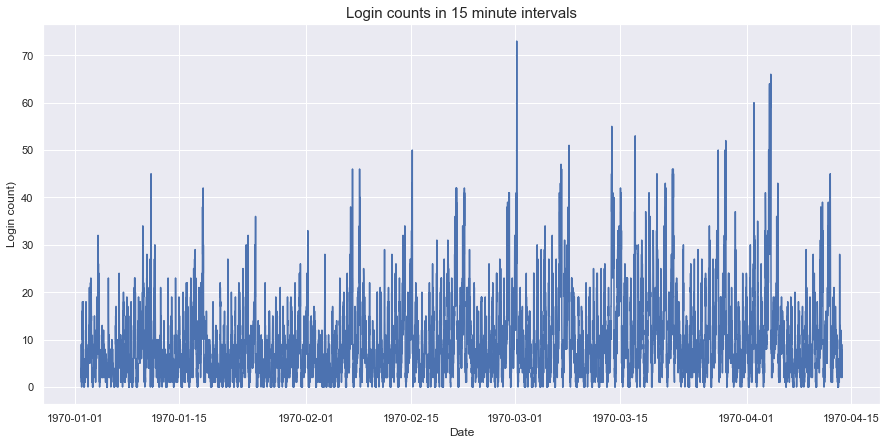

In [8]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(data_agg)
_ = plt.title('Login counts in 15 minute intervals', fontsize=15)
_ = plt.xlabel('Date')
_ = plt.ylabel('Login count)')

##### Data looks cyclical

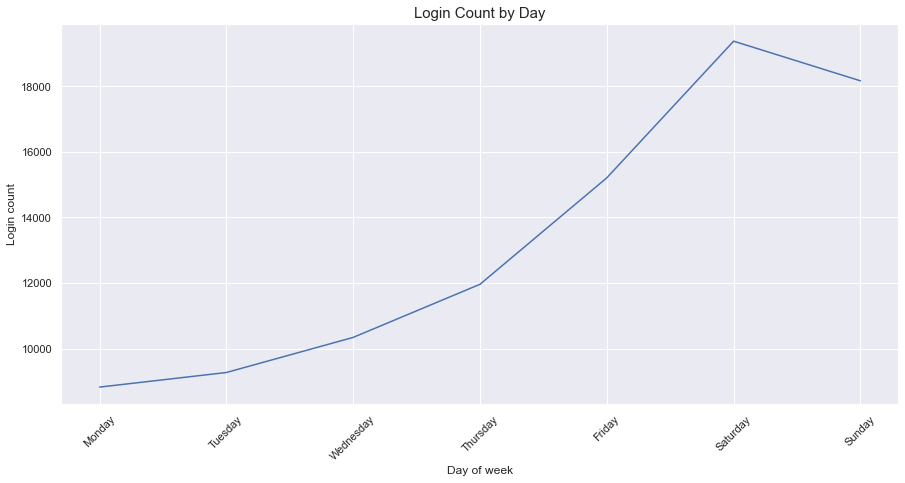

In [9]:
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
dow = data.groupby(data['login_time'].dt.day_name())['count'].count().reindex(days_of_week)

fig, ax = plt.subplots(figsize=(15, 7))
dow.plot(ax = ax)
_ = plt.xticks(rotation=45)
_ = plt.title('Login Count by Day', fontsize=15)
_ = plt.xlabel('Day of week')
_ = plt.ylabel('Login count')




##### Number of logins increase through the week, peaking on Saturday

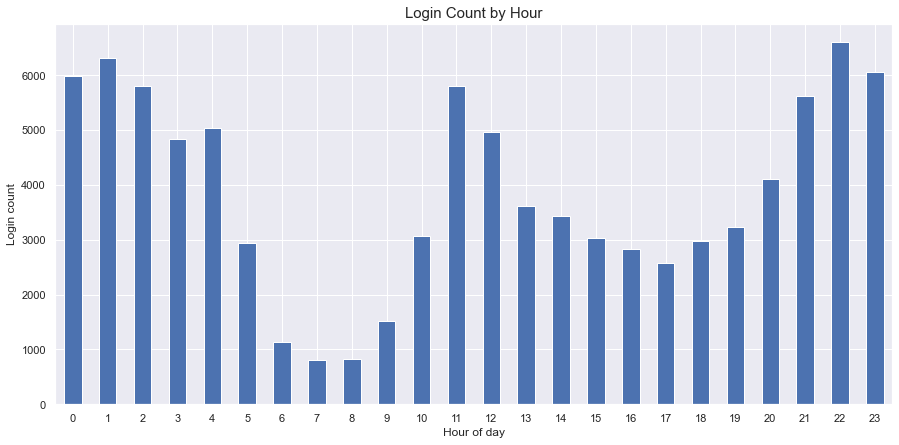

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))
data.groupby(data['login_time'].dt.hour)['count'].count().plot.bar(ax = ax)
_ = plt.title('Login Count by Hour', fontsize=15)
_ = plt.xlabel('Hour of day')
_ = plt.ylabel('Login count')
_ = plt.xticks(rotation=0)


##### At this location, there is a lot of login activity around noon and midnight

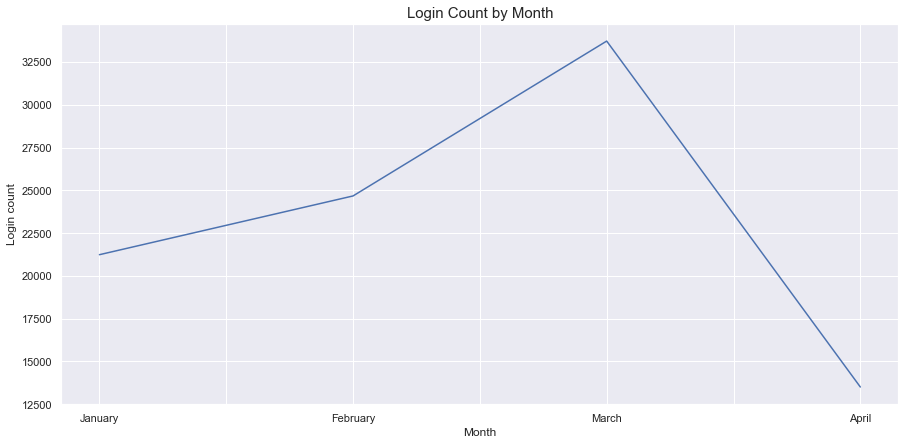

In [11]:
#what does the pattern look like monthly?
months = ['January', 'February', 'March', 'April']

fig, ax = plt.subplots(figsize=(15, 7))
data.groupby(data['login_time'].dt.month_name())['count'].count().reindex(months).plot(ax=ax)
_ = plt.title('Login Count by Month', fontsize=15)
_ = plt.xlabel('Month')
_ = plt.ylabel('Login count')

##### Logins ramped up to the peak in March then dropped drastically to April because data for April only exists until the 13th

#### Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    
    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the
observation
    
    c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

##### Answer:

1. In order to measure success, the metric I would use is the percentage of trips that begin OR end in a separate city. For clarity's sake, it is important to make the distinction that there are trips that start and end in the same city (starts in Gotham and ends in Gotham), but we already know about those since most drivers trips already tend to be exclusive to each city. What I would really want to know is, out of all the drivers trips for a given time period, how many start in Gotham and end in Metrolpolis and vice versa. That way, you get a better understanding of intercity trips.

2. The experiement to test the effectiveness of the proposed change would be an A/B test. One group would be randomly selected and serve as the control group that would continue to have to pay tolls on the bridge, while the other group, also randomly selected, would have the tolls waived as part of the proposed change. I would not put a constraint regarding time (weekdays or weekends). Both cities have opposite circadian rhythms, but that does not  mean there is no interaction between the two cities. For example, there could be significant overlap during early mornings and late evenings that would still respect both cities' natural circadian rhythms.

    With group A (control) and group B (test) groups established, the experiment would run for a predetermined about of time to collect enough data. The statistical test would be a hypothesis test for difference in proportions. The null hypothesis would be that the test group's proportion ($P_{T}$) minus the control group's proportion ($P_{C}$) would be equal to zero. The alternate hypothesis would be that the test group's proportion ($P_{T}$) minus the control group's proportion ($P_{C}$) would be greater than 0. The test can also be seen below:
    
    $H_{0}$ : $P_{T}$ - $P_{C}$ = 0
    
    $H_{a}$ : $P_{T}$ - $P_{C}$ > 0
    
    The significance level would be set to 0.05. Therefore, if the p-value were to be less than 0.05, we would accept the alternate hypothesis. Accepting the alternate hypothesis would mean that drivers who were part of the test group had a higher proportion of intercity trips than drivers in the control group, therefore reimbursing toll costs should be extended to all drivers in both cities.

#### Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [12]:
#import data
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
df.info()
#there are some missing values in avg_rating_of_driver, phone, and
#average_rating_by_driver

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


##### Look at the distribution of trips in the first 30 days

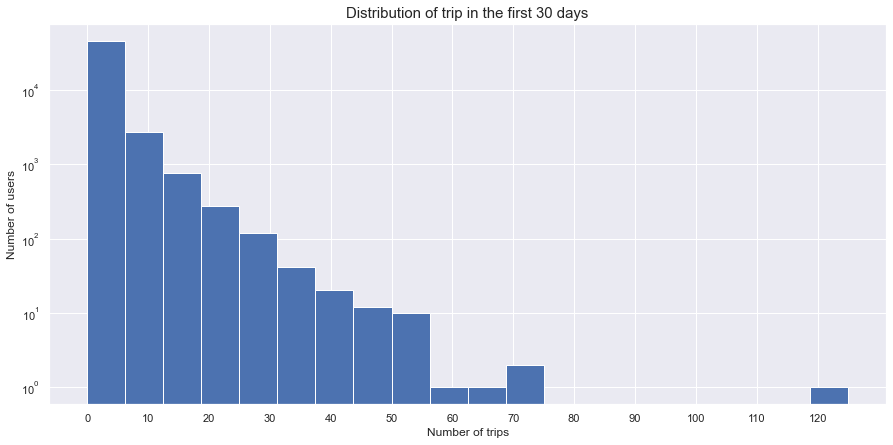

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
df['trips_in_first_30_days'].hist(bins=20, ax=ax)
_ = plt.title('Distribution of trip in the first 30 days', fontsize=15)
_ = plt.yscale('log')
_ = plt.xticks(np.arange(0, 130, 10))
_ = plt.xlabel('Number of trips')
_ = plt.ylabel('Number of users')


##### Most users seem to take somewhere between 0 and 10 trips in their first 30 days after signing up

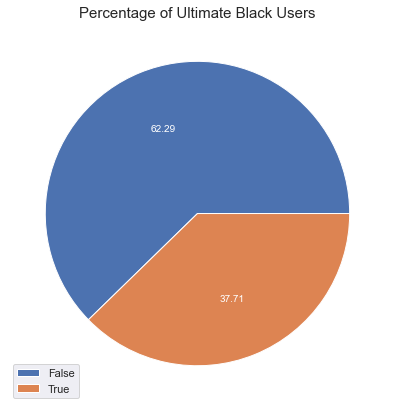

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))
df.groupby('ultimate_black_user')['ultimate_black_user'].count().plot.pie(autopct='%.2f', textprops={'color':"w"}, ax=ax)
_ = plt.title('Percentage of Ultimate Black Users', fontsize=15)
_ = plt.legend()
_ = plt.ylabel('')

##### Most users are not Ultimate Black users, but a surprising percentage are (more than 1/3)

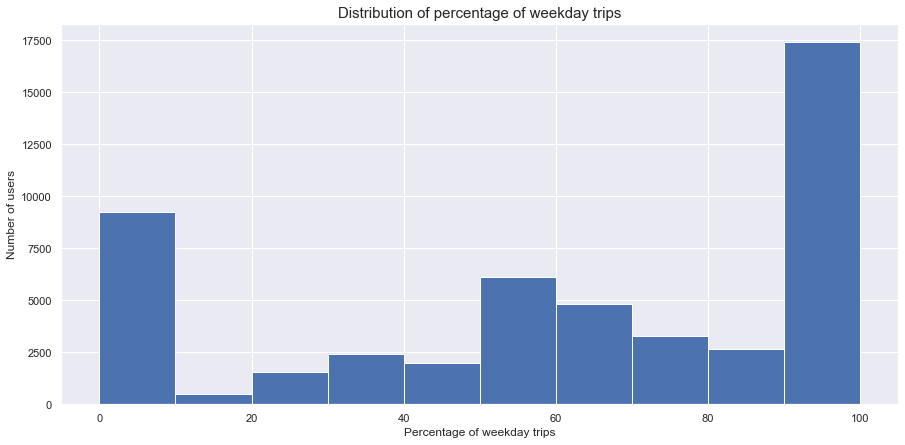

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
df['weekday_pct'].hist(ax=ax)
_ = plt.title('Distribution of percentage of weekday trips', fontsize=15)
_ = plt.xlabel('Percentage of weekday trips')
_ = plt.ylabel('Number of users')

A significant number of users use Ultimate for mostly weekday trips

Now, we'll address the null values in phone, average_rating_of_driver, and average_rating_by_driver

Phone

In [17]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [18]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [19]:
df['phone'].isnull().sum()

396

There are only 396 entries where the phone is null. To be safe, we will replace the null values with 'Other'

In [20]:
df['phone'].fillna('Other', inplace=True)
df['phone'].unique()

array(['iPhone', 'Android', 'Other'], dtype=object)

Average Rating of Driver

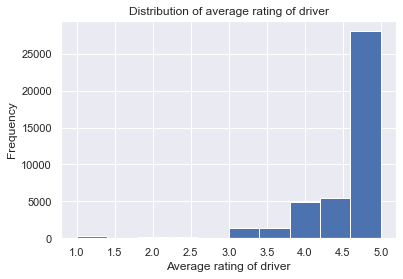

In [21]:
df['avg_rating_of_driver'].hist()
#most ratings of driver are between 4 and 5
_ = plt.title('Distribution of average rating of driver')
_ = plt.xlabel('Average rating of driver')
_ = plt.ylabel('Frequency')

In [22]:
df['avg_rating_of_driver'].isnull().sum()
#given the large number of null values, we will impute the average rating for null values

8122

In [23]:
df['avg_rating_of_driver'].fillna(round(df['avg_rating_of_driver'].mean(), 1), inplace=True)

In [24]:
df['avg_rating_of_driver'].isnull().sum()
#all nulls were replace with the mean average rating

0

##### Average Rating by Driver

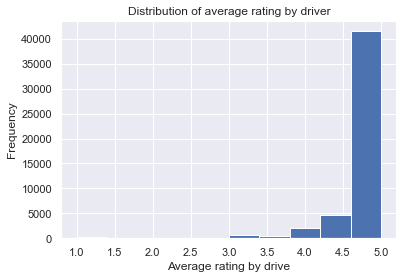

In [25]:
df['avg_rating_by_driver'].hist()
_ = plt.title('Distribution of average rating by driver')
_ = plt.xlabel('Average rating by drive')
_ = plt.ylabel('Frequency')

#most ratings by driver are between 4 and 5

In [26]:
df['avg_rating_by_driver'].isnull().sum()
#there are not many null values, but it is easy enough to fix them with the average rating,
#exactly like what we did with average rating OF driver

201

In [27]:
df['avg_rating_by_driver'].fillna(round(df['avg_rating_by_driver'].mean(), 1), inplace=True)

In [28]:
df['avg_rating_by_driver'].isnull().sum()

0

##### Fixing the null values will be helpful for the predictive modeling part of this challenge. However, to determine the fraction of observed users that were retained, some adjustments to the data will need to be made.

##### As a reminder, a user is considered retained if they used the service in the preceding 30 days. In order to make this calculation, the "signup_date" and "last_trip_date" columns will be turned into datetime objects. A new column will be created called "plus_six_months" that will be the date that is six months AFTER the signup date.

##### If a user has taken preceding 30 days in respect to the "plus_six_months" date, then the user will be considered retained. If not, of course, they will not be considered retained.

In [29]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [30]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [31]:
#check to make sure those two columns were changed to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [32]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [33]:
#create the "plus_six_months" column
df['plus_six_months'] = df['signup_date'] + pd.DateOffset(months=6)

In [34]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,plus_six_months
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-25
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-29
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-06
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-10
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-27


In [35]:
#use list comprehension for 'is adopted' column
df['is_adopted'] = [1 if df['last_trip_date'][i] > df['plus_six_months'][i] - pd.DateOffset(days=30) else 0 for i in range(len(df))]

In [36]:
#check to make sure the column makes sense
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,plus_six_months,is_adopted
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-25,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-29,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-06,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-10,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-27,0


In [37]:
#see what fraction of users are retained (is_adopted = True)
round(df['is_adopted'].sum() / len(df), 3)

0.234

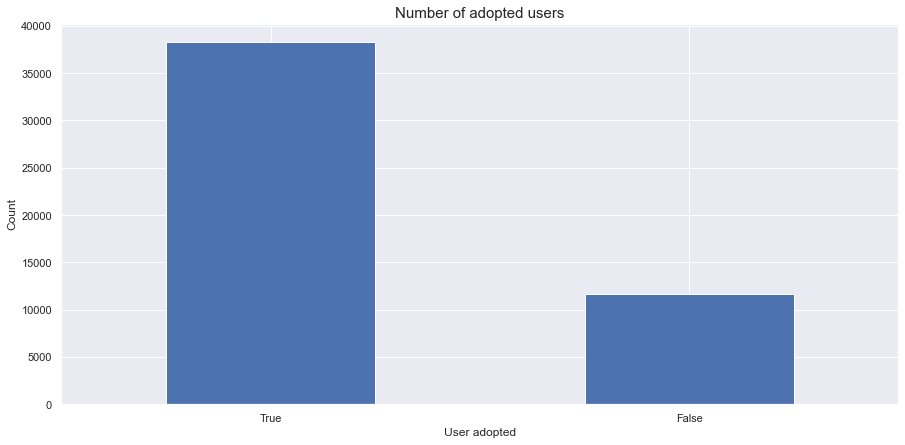

In [38]:
xlabels = ['True', 'False']

fig, ax = plt.subplots(figsize=(15, 7))

df['is_adopted'].value_counts().plot.bar()
_ = plt.xticks(range(2), xlabels, rotation=0)
_ = plt.title('Number of adopted users', fontsize=15)
_ = plt.xlabel('User adopted')
_ = plt.ylabel('Count')


##### Build a predictive model

##### The two models that will be tested are Support Vector Classifier and Random Forest. The data is imbalanced so the scoring metrics will be AUROC and PR-AUC.

In [247]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

In [248]:
#make copy of dataset for ml
df_ml = df.copy()

In [249]:
#convert categorical variables into dummy/indication variables
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  plus_six_months         50000 non-null  dateti

In [250]:
#drop 'plus six months' because that was only created to make "is adopted"
df_ml.drop(['plus_six_months'], axis=1, inplace=True)
df_ml.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_adopted
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [251]:
df_ml['signup_date_weekday'] = df_ml['signup_date'].dt.weekday

df_ml['last_trip_date_weekday'] = df_ml['last_trip_date'].dt.weekday


In [252]:
#drop signup_date and last_trip_date because they have been "engineered" into separate columns
df_ml.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [253]:
#change categorical columns to integers
df_ml = pd.get_dummies(df_ml, ['city', 'phone'])

In [254]:
#convert boolean column ultimate_black_user to int where 1 is where and 0 is false
#df['ultimate_black_user'] = 
df_ml['ultimate_black_user'] = df_ml['ultimate_black_user'].astype(int)

In [256]:
#double check first 5 columns to make sure everything is in order
df_ml.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_adopted,signup_date_weekday,last_trip_date_weekday,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,5,1,0,1,0,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,2,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,1,1,0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,4,6,0,1,0,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,5,0,0,1,1,0,0


In [257]:
#create X and y variables to split
y = df_ml['is_adopted']
X = df_ml.drop('is_adopted', axis=1)

##### SVM

In [258]:
svm = SVC()

In [259]:
svm_results = cross_validate(svm, X, y, cv=3)

In [260]:
svm_results['test_score'].mean()

0.7677399938140682

##### Random Forest

In [261]:
rf = RandomForestClassifier()

In [262]:
rf_results = cross_validate(rf, X, y, cv=3)

In [263]:
rf_results['test_score'].mean()

0.7929000966362528

##### Cross validation results

In [264]:
print(f"SVM average test score: {svm_results['test_score'].mean()}")
print(f"Random Forest average test score: {rf_results['test_score'].mean()}")
print()
print('Random Forest has the better score, so it will be used as the final model')



SVM average test score: 0.7677399938140682
Random Forest average test score: 0.7929000966362528

Random Forest has the better score, so it will be used as the final model


##### Train/test split the data

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)

##### GridSearch for Random Forest

In [266]:
# param_grid = {
#     'n_estimators' : np.arange(200, 2001, 200),
#     'max_features' : ['auto', 'sqrt']
# }

param_grid = {
    'n_estimators' : np.arange(470, 501, 10),
    'max_depth' : [6, 8, 10]
}

In [267]:
rf_gs = GridSearchCV(rf, param_grid=param_grid, cv=3)

In [268]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [270]:
rf_gs.best_params_

{'max_depth': 8, 'n_estimators': 480}

In [271]:
rf_gs.best_score_

0.7997600230387714

##### Make predictions and evaluate

In [272]:
#predict on the test set
predictions = rf_gs.predict_proba(X_test)

In [273]:
roc_auc_score(y_test, predictions[:, 1])

0.8102197086757488

In [274]:
average_precision_score(y_test, predictions[:, 1])

0.5560065111987138

##### Baseline to put precision-recall in perspective

In [275]:
len(df[df.is_adopted == 1]) / len(df[df.is_adopted == 0])

0.3052785464418107

In [276]:
rf_feature_importances = list(zip(X.columns, rf_gs.best_estimator_.feature_importances_))

In [277]:
df_rf_feat_importances = pd.DataFrame(rf_feature_importances, columns=['col_name', 'feature_importance']).sort_values('feature_importance', ascending=False).set_index('col_name')

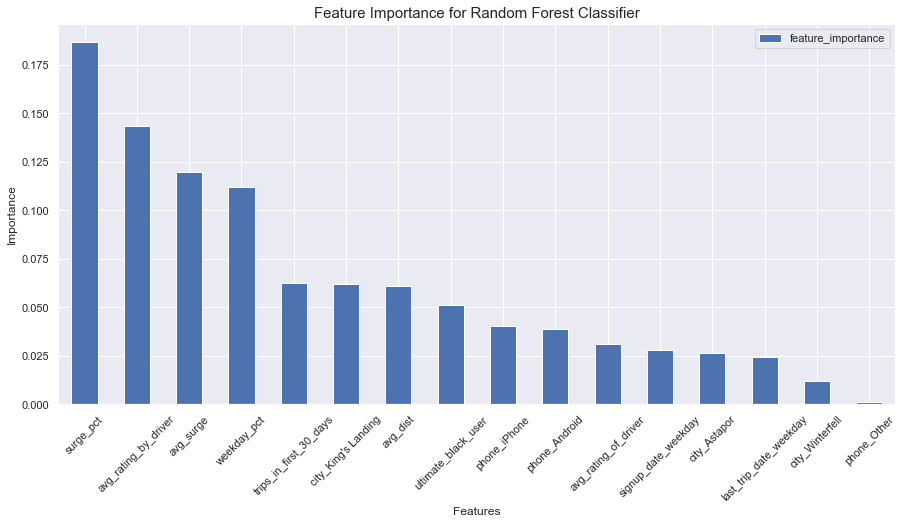

In [282]:
fig, ax = plt.subplots(figsize=(15, 7))
df_rf_feat_importances.plot.bar(ax=ax)
_ = plt.title('Feature Importance for Random Forest Classifier', fontsize=15)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Features')
_ = plt.ylabel('Importance')

##### Actionalable insights:

The top 4 features are "surge_pct," "avg_rating_by_driver," "avg_surge," and "weekday_pct.

The first noticeable pattern is that "surge_pct" and "avg_surge" are both in the top features. An idea worth pursuing regarding surge is to add a discount during certain surge times in order to increase user retention. Also, it could be valuable to investigate when these surge times are to get more insight about the users' behaviors.

Regarding "weekday_pct," a separate analysis should be done on weekend vs weekday behavior patterns. The feature indicated that "weekday_pct" plays a significant role so there is most likely some more actionable information to be derived from futher analysis.

An analysis should also be done on "avg_rating_by_driver." It could be too subjective to pull any actionable info. What could be interesting is to break down the ratings by geographic location and times.

Finally, in regards to implementing a model, more data will a better option. The model should only be retrained when there is enough data collected about a user, as well, in order to avoid bias towards historical data.